In [1]:
import h5py
import ast
from astropy.table import QTable, Table, Column, vstack
import astropy.units as u
import astropy
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import simsurvey
import simsurvey_tools as sst
import matplotlib.pylab as plt
import pandas as pd
import os
from ZTF_hdf5 import Write_LightCurve, Read_LightCurve, Plot_LightCurve
from ztf_simu import Simul_lc

In [2]:
home_dir = os.environ.get('HOME')
folder_dir = os.path.join(home_dir, 'ZTF/data/')
sfd98_dir = os.path.join(folder_dir, 'sfd98')
print(sfd98_dir)

/Users/manon/ZTF/data/sfd98


In [3]:
simu = Simul_lc(folder_dir,  z_range=(0.01, 0.1), dec_range=(-30, 90), n_det=1, 
                 ntransient=11, seed=70, threshold=1)
lc = simu.simul_lc()

args = range_args(self.generator.ntransient, *args) =  (0, 11, 1)
Determining field IDs for all objects


FloatProgress(value=0.0)


Generating lightcurves
ntransient: 11


FloatProgress(value=0.0)

In [4]:
lc[0]

time,band,flux,fluxerr,zp,zpsys,field,ccd,comment
float64,str4,float64,float64,float64,str2,int64,int64,str1
58229.506794000044,ztfg,22.12892102494979,171.80270430107885,26.275,ab,853,4,
58232.503541700076,ztfg,27.251412705865125,65.92194243549145,26.275,ab,853,4,
58242.4479398001,ztfg,69.57169230930347,88.51955723120075,26.275,ab,853,4,
58242.47065970022,ztfr,16.718715089481503,71.63257945434447,26.325,ab,853,4,
58245.47055559978,ztfg,225.37232405108668,252.9489021180543,26.275,ab,853,4,
58252.46848380007,ztfg,8.960049186678166,32.46660173254101,26.275,ab,853,4,
...,...,...,...,...,...,...,...,...
58297.47138890019,ztfg,-131.69331861196517,100.70122601873807,26.275,ab,853,4,
58300.42960650008,ztfr,6.715194982250678,37.62473203914706,26.325,ab,853,4,


In [60]:
ok = lc.meta
rejected = lc.meta_rejected
print(rejected)

[(0.0710587 , 58382.51040506, 0.0010709 ,  0.66807125, -0.11878006, 0.03604805, 206.66375667,  11.85894168, 0.02402697, 41)
 (0.09263116, 58503.51424671, 0.0003445 , -0.87145765,  0.01970639, 0.03029599, 231.38005726,  47.76994498, 0.01916646, 49)
 (0.08725478, 58398.04990168, 0.00047687,  0.89553241,  0.04628298, 0.46425143, 249.96420069, -13.03941474, 0.45997663, 74)
 (0.02856188, 58288.31068126, 0.0083197 , -0.4870437 , -0.19739304, 0.09667933, 166.79537365, -23.92312687, 0.10259489, 78)
 (0.06607628, 58512.48420516, 0.00070838, -0.52145801,  0.0860664 , 0.08226065, 211.13872315, -17.92064651, 0.08158707, 85)]


In [61]:
def Histo2(model, type_sn):
    var = ['z', 'x0', 'x1', 'c', 't0']
    dico = dict(zip(var, [(0,0), (0,1), (1,0), (1,1), (2,0)]))
    
    for variables in var :
        ipos = dico[variables][0]
        jpos = dico[variables][1]
        
        axs[ipos, jpos].hist(model[variables], label = 'Model : {}'.format(type_sn), alpha = 0.3)
        #plt.hist(model.meta_full[variables], label = 'Model : {}'.format(type_sn), alpha = 0.5)
        axs[ipos, jpos].set_title('Histo var {}'.format(variables))
        axs[ipos, jpos].legend()

<IPython.core.display.Javascript object>


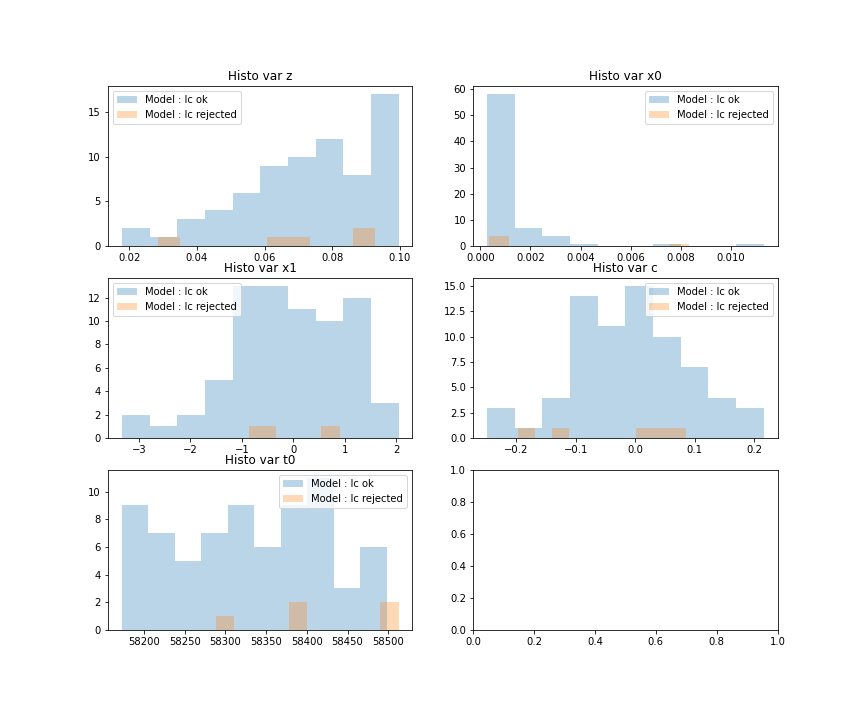

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(12,10))
Histo2(lc.meta, 'lc ok')
Histo2(lc.meta_rejected, 'lc rejected')

In [63]:
len(lc.meta_rejected)

5

In [64]:
clas = Write_LightCurve()
data = clas.write_data('Data', lc)
meta = clas.write_meta()
meta

lc is not an astropy.table.table.Table type <class 'simsurvey.simulsurvey.LightcurveCollection'>
OrderedDict([('directory', '/Users/manon/dataLC/Meta.hdf5'), ('file_name', 'Meta.dhf5')])


In [65]:
meta_rej = clas.Tab_metaRejected(lc)

clas_meta = Read_LightCurve(file_name='Meta.hdf5')
read_meta = clas_meta.Read_file(path='meta')

for i, rows in enumerate(meta_rej):
    read_meta.add_row(rows)
read_meta

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str5
0.09746273114426751,58431.1161511878,0.00032688610167431526,-1.075623160285138,0.05373172349892344,0.04335131176617404,328.6798487251429,-11.108766056862144,0.03144831487235068,0,SN_0
0.09545085017442173,58406.340498969235,0.0007638831438423678,0.8850286937943359,-0.15570725537551458,0.036556471497440124,121.51121551219077,15.175751565226438,0.023819758299954762,1,SN_1
0.09665627314283415,58470.63678834814,0.0002912128457131171,1.964008653469349,0.15618570036622256,0.024013613497666033,228.44109277756831,68.89285362193364,0.019345419260699645,3,SN_2
0.06768985090609805,58497.88168641114,0.0008771976188588879,-1.1127273622072835,-0.07619808620695145,0.05451622896591582,54.846219670176765,-9.365217033539938,0.052112500456992984,4,SN_3
0.052395678566137256,58389.33316376612,0.0016713969192296038,0.3966724135657371,-0.0647782894920149,0.10966090043687227,75.98354243298574,71.03499138949816,0.11784380761362098,5,SN_4
0.07527202479792483,58482.273693742165,0.0007653489881588746,0.4002716936056357,-0.01786014469957698,0.01732068145809405,178.8042584198702,25.463725589168384,0.015929187950450445,7,SN_5
...,...,...,...,...,...,...,...,...,...,...
0.08109928015303894,58412.907004454246,0.0005580277380368183,1.217560938174468,0.027358733025016166,0.0227643309584226,24.14355069444546,-8.107758106073087,0.02688787650922933,97,SN_70
0.06011245156057485,58375.493367839015,0.0014876956650210077,0.47799532788798405,-0.08421292302911576,0.12669918532458418,1.9994816793165793,7.711846786273931,0.11411888291926636,99,SN_71


In [66]:
import csv
from astropy.table import Table
home_dir = os.environ.get('HOME')
folder_dir = os.path.join(home_dir, 'dataLC/selection_tab.csv')
folder_dir_seuil = os.path.join(home_dir, 'dataLC/seuil_name_selec.csv')

table = Table.read(folder_dir) #Lecture du fichier csv
table_2 = Table.read(folder_dir_seuil) #Lecture du fichier csv

In [67]:
print(table,'\n\n', table_2)

 col  lim_col type     op1    
----- ------- ---- -----------
phase       0  int operator.le
phase       0  int operator.ge
phase     -10  int operator.le
phase      20  int operator.ge
 band    ztfr  str operator.eq
 band    ztfg  str operator.eq
 band    ztfi  str operator.eq 

 seuil  name_selec 
----- ------------
    4   nb_phase<0
   10   nb_phase>0
    1 nb_phase<-10
    1  nb_phase>20
    0 nb_band_ztfr
    0 nb_band_ztfg
    0 nb_band_ztfi


In [68]:
import operator
def selec_phase(Tab, csvFile, limSNR, selec=False, Verbose=False, Plot=False):
    
    SNR = Tab['flux'] / Tab['fluxerr']
    phase = (Tab['time'] - Tab.meta['t0']) / (1-Tab.meta['z'])
    Tab.add_columns([SNR, phase], names=['SNR', 'phase'])
    mask_SNR = Tab['SNR'] >= limSNR
    Tab = Tab[mask_SNR]
    len_tab = []
    
    for i, cols in enumerate(csvFile):
        if cols['col'] not in Tab.colnames:
            print(cols['col'], 'This column doesnt exist') 
    
        else:
            col = cols['col']
            op = eval(cols['op1'])
            type_ = eval(cols['type'])
            lim = type_(cols['lim_col'])
    
            mask = op(Tab[col], lim)
            new_Tab = Tab[mask]
        
            len_tab.append(len(new_Tab))
            
    if Verbose:
        print('min :', np.min(Tab['phase']), 'max :', np.max(Tab['phase']))
    if Plot:
        x = Tab['phase']
        y = Tab['flux']

        fig, axs = plt.subplots(1, 1, figsize=(10,8))
        axs.plot(x,y,marker = '*')
            
    if selec:
        return Tab
    else:
        return len_tab

In [70]:
clas2 = Read_LightCurve(file_name='Data.hdf5')
read_data = clas2.Read_file(path='SN_0')

rtot = []
r = []
rb = table_2['name_selec']
for i, row in enumerate(read_meta):
    if row['path'] == 'SN_{}'.format(i):
        read_data = clas2.Read_file(path='SN_0')
        len_Tab = selec_phase(read_data, table, 5)
        r.append(len_Tab)
    else : 
        b = np.full((len(table_2)), -1)
        r.append(b.tolist())

rtot = np.array(r)

for i in range(0, len(rtot[0])):
    line = [row[i] for row in rtot]
    c = Column(line)
    read_meta.add_column(c, name=rb[i])
    read_meta = read_meta
    
read_meta

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str5,int64,int64,int64,int64,int64,int64,int64
0.09746273114426751,58431.1161511878,0.00032688610167431526,-1.075623160285138,0.05373172349892344,0.04335131176617404,328.6798487251429,-11.108766056862144,0.03144831487235068,0,SN_0,4,4,0,0,5,3,0
0.09545085017442173,58406.340498969235,0.0007638831438423678,0.8850286937943359,-0.15570725537551458,0.036556471497440124,121.51121551219077,15.175751565226438,0.023819758299954762,1,SN_1,4,4,0,0,5,3,0
0.09665627314283415,58470.63678834814,0.0002912128457131171,1.964008653469349,0.15618570036622256,0.024013613497666033,228.44109277756831,68.89285362193364,0.019345419260699645,3,SN_2,4,4,0,0,5,3,0
0.06768985090609805,58497.88168641114,0.0008771976188588879,-1.1127273622072835,-0.07619808620695145,0.05451622896591582,54.846219670176765,-9.365217033539938,0.052112500456992984,4,SN_3,4,4,0,0,5,3,0
0.052395678566137256,58389.33316376612,0.0016713969192296038,0.3966724135657371,-0.0647782894920149,0.10966090043687227,75.98354243298574,71.03499138949816,0.11784380761362098,5,SN_4,4,4,0,0,5,3,0
0.07527202479792483,58482.273693742165,0.0007653489881588746,0.4002716936056357,-0.01786014469957698,0.01732068145809405,178.8042584198702,25.463725589168384,0.015929187950450445,7,SN_5,4,4,0,0,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.08109928015303894,58412.907004454246,0.0005580277380368183,1.217560938174468,0.027358733025016166,0.0227643309584226,24.14355069444546,-8.107758106073087,0.02688787650922933,97,SN_70,4,4,0,0,5,3,0
0.06011245156057485,58375.493367839015,0.0014876956650210077,0.47799532788798405,-0.08421292302911576,0.12669918532458418,1.9994816793165793,7.711846786273931,0.11411888291926636,99,SN_71,4,4,0,0,5,3,0


In [71]:
def selec(list_lenTable, csvFile):
    
    res = 1
    len_table = []
    
    for i, len_selec in enumerate(list_lenTable):
        if res:
            res &= operator.ge(len_selec, csvFile['seuil'][i])
        if not res:
            break
            
    return res

In [72]:
R, sel_list = [], []

for i, path in enumerate(read_meta['path']):
    class_data = Read_LightCurve(file_name='Data.hdf5')
    if path == 'SN_{}'.format(i):
        lc = class_data.Read_file(path=path)
        lc_len = selec_phase(lc, table, 5, selec=False)
        sel = selec(lc_len, table_2)
        R.append(sel)
    else:
        R.append(0)

pass_selec = Column(R)

if 'pass selec' in read_meta.colnames:
    read_meta['pass selec'] = pass_selec
else :
    read_meta.add_column(pass_selec, name = 'pass selec')
    
read_meta

/var/folders/8n/j9hb298x4xq39l_vtv55kkp00000gp/T/ipykernel_68961/1317654429.py:4: RuntimeWarning: invalid value encountered in true_divide
  SNR = Tab['flux'] / Tab['fluxerr']


z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi,pass selec
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str5,int64,int64,int64,int64,int64,int64,int64,int64
0.09746273114426751,58431.1161511878,0.00032688610167431526,-1.075623160285138,0.05373172349892344,0.04335131176617404,328.6798487251429,-11.108766056862144,0.03144831487235068,0,SN_0,4,4,0,0,5,3,0,0
0.09545085017442173,58406.340498969235,0.0007638831438423678,0.8850286937943359,-0.15570725537551458,0.036556471497440124,121.51121551219077,15.175751565226438,0.023819758299954762,1,SN_1,4,4,0,0,5,3,0,0
0.09665627314283415,58470.63678834814,0.0002912128457131171,1.964008653469349,0.15618570036622256,0.024013613497666033,228.44109277756831,68.89285362193364,0.019345419260699645,3,SN_2,4,4,0,0,5,3,0,0
0.06768985090609805,58497.88168641114,0.0008771976188588879,-1.1127273622072835,-0.07619808620695145,0.05451622896591582,54.846219670176765,-9.365217033539938,0.052112500456992984,4,SN_3,4,4,0,0,5,3,0,0
0.052395678566137256,58389.33316376612,0.0016713969192296038,0.3966724135657371,-0.0647782894920149,0.10966090043687227,75.98354243298574,71.03499138949816,0.11784380761362098,5,SN_4,4,4,0,0,5,3,0,1
0.07527202479792483,58482.273693742165,0.0007653489881588746,0.4002716936056357,-0.01786014469957698,0.01732068145809405,178.8042584198702,25.463725589168384,0.015929187950450445,7,SN_5,4,4,0,0,5,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.08109928015303894,58412.907004454246,0.0005580277380368183,1.217560938174468,0.027358733025016166,0.0227643309584226,24.14355069444546,-8.107758106073087,0.02688787650922933,97,SN_70,4,4,0,0,5,3,0,0
0.06011245156057485,58375.493367839015,0.0014876956650210077,0.47799532788798405,-0.08421292302911576,0.12669918532458418,1.9994816793165793,7.711846786273931,0.11411888291926636,99,SN_71,4,4,0,0,5,3,0,1


# Light curve fit 

In [154]:
from ztf_fit import SN_fit

In [160]:
mask_pass_selec = read_meta['pass selec'] == 1
read_meta_test = read_meta[mask_pass_selec]

table_rows = []
keys = []
err = []

for i, row in enumerate(read_meta_test):
        path = row['path']
        data = Read_LightCurve(file_name='Data.hdf5')
        lc = data.Read_file(path=path)
        
        fit = SN_fit(lc)
        sn = fit.fit_sn()
        #plot = fit.plot_sn()
        table_rows.append(sn[0].parameters)
        keys.append(path)
        err.append(sn[0].errors)

In [161]:
err_name = ['z_err', 't0_err', 'x0_err', 'x1_err', 'c_err']
#param = SN_fit(read_meta_test)
#err = SN_fit(read_meta_test, error=True, Plot=False)
err = Table(err)

param_names = sn[0].param_names

c = Column(keys, name='path')
tab_param = Table(rows=table_rows, names=param_names)
tab_param.add_column(c, index=0) 

tab_param.add_columns([err['z'], err['t0'], err['x0'], err['x1'], err['c']], names=err_name)
tab_param

path,z,t0,x0,x1,c,z_err,t0_err,x0_err,x1_err,c_err
str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
SN_4,0.052655134859319885,58389.30802491071,0.0011140273548813598,0.4167665877315335,0.04593629822951623,0.0084406568586145,0.0687142353708623,1.2092228709130033e-05,0.09352162554415011,0.009405287114471557
SN_13,0.05290170216814065,58373.93331298291,0.00113856537563456,0.016701712188423923,0.0477897964930845,0.004159720209536918,0.052058405733987456,7.3695517409431335e-06,0.08767396714301108,0.006783668756602534
SN_17,0.08964567299002515,58330.05888821991,0.0008077760256082628,-0.5156563208692212,-0.24820348848909052,0.003948080223990777,0.08827943607320776,1.1899337782478333e-05,0.08120772312776721,0.009704466702291747
SN_26,0.0668699576439546,58348.935978975824,0.0008679314686830805,1.2207585730663966,0.08520559575550335,0.0029387542095733327,0.03922082308054087,5.182389834257355e-06,0.04814352831917846,0.006377954102260419
SN_29,0.07904619591908545,58329.5665378792,0.0001505727758084215,1.1807731091534084,0.44134634146512086,0.06653034472783699,98.96881032517194,1.0000010090190525,1.0830630191581065,1.0011091420300486
SN_33,0.03618565923687265,58220.808553746916,0.002704271435167515,0.9804965575039728,0.051505940302650745,0.004180475439817699,0.07463550428292365,3.177009766741433e-05,0.0788779598618508,0.012076324739586244
...,...,...,...,...,...,...,...,...,...,...
SN_48,0.09619645022486145,58336.792849375735,0.0002702544191308782,-1.074307326468369,0.1431208405046608,0.006415960402979669,0.21229114278685302,6.6270652086888e-06,0.13709363969381574,0.017929014650807033
SN_51,0.09999999962929657,58392.76834513207,0.0006116492039368862,1.6442784103121777,-0.08644358591137387,0.006630749632158005,0.12438872486745822,9.373352765401556e-06,0.17744420001419126,0.013702131922812574


In [162]:
len(tab_param)

18

<IPython.core.display.Javascript object>


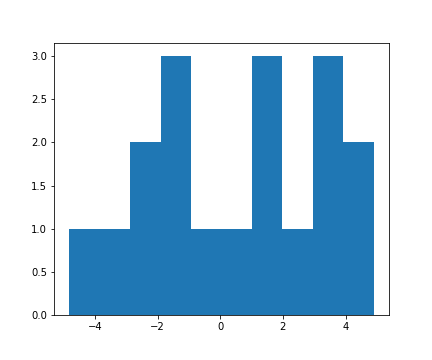

moyenne = 0.5680104767766616
ecarttype = 2.6991427688961185


In [163]:
for i, row in enumerate(tab_param):
    z_simu = read_meta_test['z']
    z_fit = row['z']
    z_err = row['z_err']
    path = row['path']
    diff_z = (z_simu-z_fit)/z_err

moy = np.mean(diff_z)
ecarttype = np.std(diff_z)

plt.figure(figsize=(6,5))
plt.hist(diff_z)
print('moyenne =', moy)
print('ecarttype =', ecarttype)
plt.show()

<IPython.core.display.Javascript object>


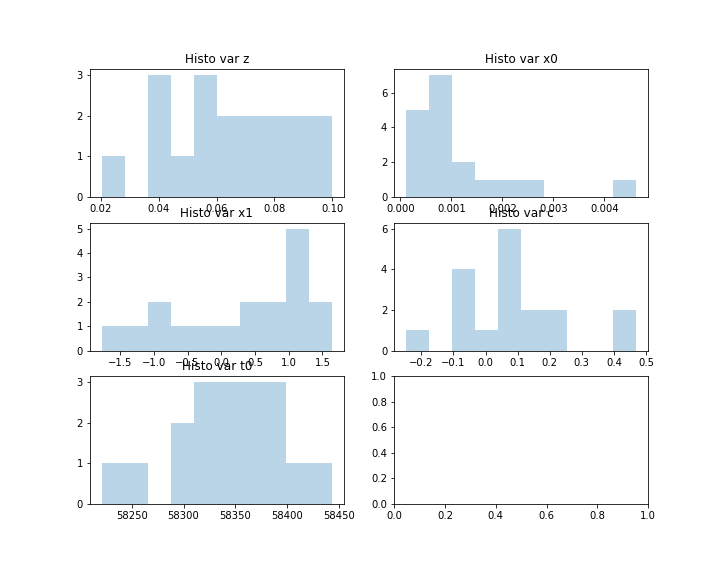

In [164]:
var = ['z', 'x0', 'x1', 'c', 't0']
dico = dict(zip(var, [(0,0), (0,1), (1,0), (1,1), (2,0)]))

fig, axs = plt.subplots(3, 2, figsize=(10,8))
for variables in var :
    err_param = tab_param['{}_err'.format(variables)]
    ipos = dico[variables][0]
    jpos = dico[variables][1]
        
    axs[ipos, jpos].hist(tab_param[variables], alpha = 0.3)
    axs[ipos, jpos].set_title('Histo var {}'.format(variables))